In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

## Read Dataset

In [2]:
df = pd.read_csv('customers_dataset.csv')
df.head()

,Gender,Age,Income,Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [3]:
encoded_df = pd.get_dummies(df['Gender'])

df = pd.concat([df, encoded_df], axis=1).drop('Gender', axis=1)

df.head()

,Age,Income,Score,Female,Male
0,19,15,39,False,True
1,21,15,81,False,True
2,20,16,6,True,False
3,23,16,77,True,False
4,31,17,40,True,False


## Find Optimal Number of Clusters

### K-means Distortion and Elbow Method

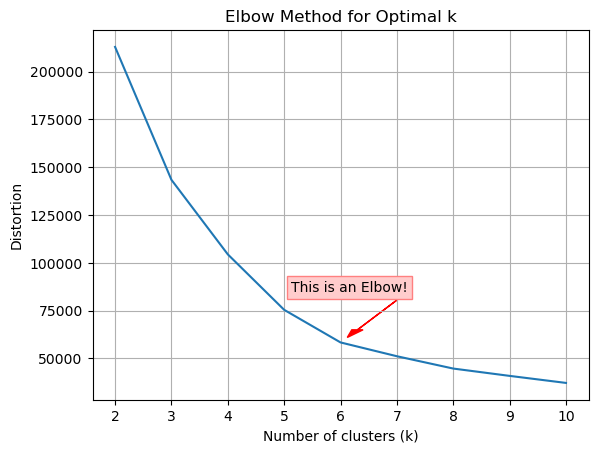

In [38]:
distortions = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(df)
    distortions.append(kmeans.inertia_)
    
plt.plot(range(2, 11), distortions)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Distortion')
plt.title('Elbow Method for Optimal k')
plt.grid()
plt.arrow(7.2, 85000, -0.9, -20000, head_width=0.2, head_length=4000, fc='r', ec='r')
plt.text(7.2, 85000, "This is an Elbow!", ha="right", bbox=dict(boxstyle="square", ec=(1., 0.5, 0.5), fc=(1., 0.8, 0.8)))
plt.savefig("assets/Q7_elbow.png")

### Silhoutte Score

In [5]:
def find_optimal_k(X, begin_k, end_k, score_func, max=1):
    scores = []

    for k in range(begin_k, end_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X)

        score = score_func(X, kmeans.labels_)
        scores.append(score)

    optimal_k = np.argmax(max * np.array(scores)) + begin_k
    return optimal_k

In [6]:
optimal_k = find_optimal_k(df, 2, 10, silhouette_score, max=1)
print(f"The optimal number of clusters (k) is: {optimal_k}")

The optimal number of clusters (k) is: 6


### Davies-Bouldin Index

In [7]:
optimal_k = find_optimal_k(df, 2, 10, davies_bouldin_score, max=-1)
print(f"The optimal number of clusters (k) is: {optimal_k}")

The optimal number of clusters (k) is: 6


###  Calinski- Harabasz Index

In [8]:
optimal_k = find_optimal_k(df, 2, 10, calinski_harabasz_score, max=1)
print(f"The optimal number of clusters (k) is: {optimal_k}")

The optimal number of clusters (k) is: 6


## Visualizing

In [9]:
kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)
kmeans.fit(df)
labels = kmeans.labels_

In [10]:
def plot_clusters(X, labels, title):
    classes = np.unique(labels)
    for i, c in zip(range(len(classes)), classes):
        plt.scatter(X[labels==c, 0], X[labels==c, 1], label=f'class {i}')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.title(title)
    plt.grid()
    plt.legend()

### PCA

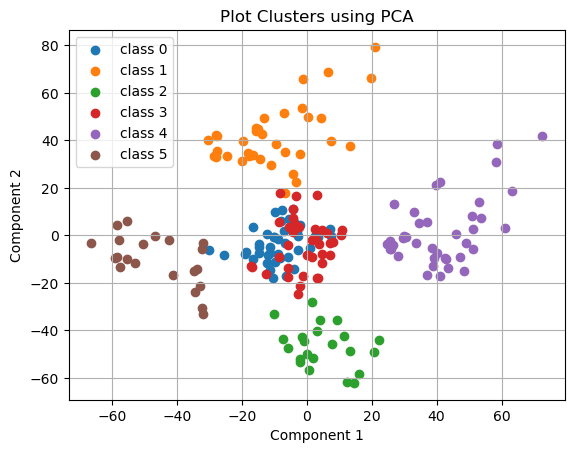

In [11]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df)
plot_clusters(X_pca, labels, 'Plot Clusters using PCA')
plt.savefig('assets/Q7_PCA.png')

### TSNE

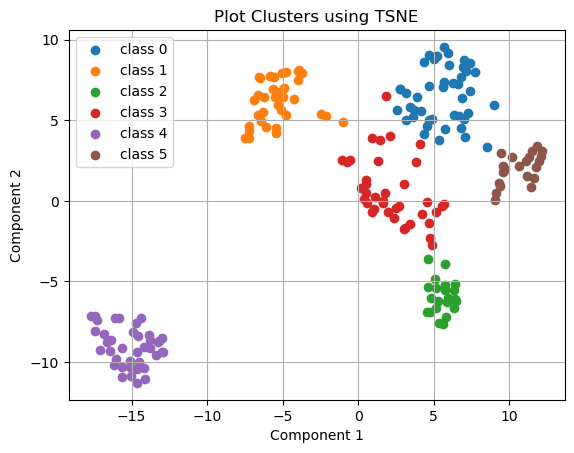

In [12]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(df)
plot_clusters(X_tsne, labels, "Plot Clusters using TSNE")
plt.savefig('assets/Q7_TSNE.png')